# Inverter Simulation Performance Measurements

In [2]:
from dpsim.MeasurementUtils import Measurement 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
logs_dir = '../../../dpsim-logs/logs_inverter/'
seq_mean = []

for threads in range(0,13,2):   
    seq_meas = []
    for seq in range(1,11):
        log_path =  logs_dir + 'DP_Inverter_Grid_Parallel_FreqSplit_t' + str(threads) + '_s' + str(seq) + '/' + \
                    'DP_Inverter_Grid_Parallel_FreqSplit_t' + str(threads) + '_s' + str(seq) + '_step_times.log'            
        #print(log_path)
        meas = Measurement.read_timestep_csv(log_path)['step_time'].data
        # aggregate the measurements from the different iterations
        seq_meas = np.concatenate( (seq_meas, meas), axis=0 )
    #print(seq_meas.shape)
    seq_mean.append({'threads': threads, 'values': seq_meas.mean()})   

pd_mean_freqsplit = pd.DataFrame(seq_mean)

In [3]:
pd_mean_freqsplit

threads    values
0        0  0.000023
1        2  0.000023
2        4  0.000020
3        6  0.000021
4        8  0.000020
5       10  0.000021
6       12  0.000019

In [5]:
logs_dir = '../../../dpsim-logs/logs_inverter/'
seq_mean = []

for threads in range(0,13,2):   
    seq_meas = []
    for seq in range(1,11):
        log_path =  logs_dir + 'DP_Inverter_Grid_Parallel_t' + str(threads) + '_s' + str(seq) + '/' + \
                    'DP_Inverter_Grid_Parallel_t' + str(threads) + '_s' + str(seq) + '_step_times.log'            
        #print(log_path)
        meas = Measurement.read_timestep_csv(log_path)['step_time'].data
        # aggregate the measurements from the different iterations
        seq_meas = np.concatenate( (seq_meas, meas), axis=0 )
    #print(seq_meas.shape)
    seq_mean.append({'threads': threads, 'values': seq_meas.mean()})   

pd_mean_frequnit = pd.DataFrame(seq_mean)

In [5]:
pd_mean_frequnit

threads    values
0        0  0.000037
1        2  0.000038
2        4  0.000037
3        6  0.000037
4        8  0.000037
5       10  0.000037
6       12  0.000038

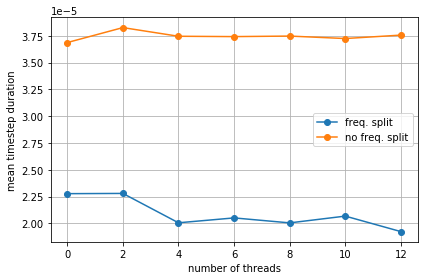

In [8]:
threads = np.arange(0,13,2) 
plt.plot(threads, pd_mean_freqsplit['values'], 'o-', label='freq. split')
plt.plot(threads, pd_mean_frequnit['values'], 'o-', label='no freq. split')

plt.legend(loc='center right')
plt.grid()
#plt.ylim([-0.01,0.2])
#plt.xlim([0,0.0009])
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
plt.xlabel('number of threads')
plt.ylabel('mean timestep duration')
plt.tight_layout()
plt.savefig('inverter_freq_split.pdf')
plt.savefig('inverter_freq_split.png', dpi=300)
pd_mean_freqsplit.to_csv('pd_mean_freqsplit.csv')
pd_mean_frequnit.to_csv('pd_mean_frequnit.csv')

## Parallel - rt profile no log

In [6]:
parallel = Measurement.read_timestep_csv('../../../logs/DP_Inverter_Grid_Parallel/DP_Inverter_Grid_Parallel_step_times.log')
data = parallel['step_time'].data
xaxis = parallel['step_time'].xaxis

print('maximum timestep:')
print(data.max())
print('standard deviation:')
print(data.std())
print('mean timestep:')
print(data.mean())

plt.figure()
plt.hist(data, 50)
plt.xlabel('timestep duration (s)')
plt.ylabel('number of timesteps')
#plt.xlim([0.0001,0.0005])
plt.grid()
#plt.savefig('parallel_rt_nolog_hist.png')

plt.figure()
plt.plot(xaxis, data)
plt.xlabel('timestep index')
plt.ylabel('timestep duration (s)')
#plt.ylim([0.0001,0.0006])
plt.grid()
#plt.savefig('parallel_rt_nolog_time.png')

maximum timestep:
0.000269
standard deviation:
1.0380271732474146e-06
mean timestep:
0.00021227625999999998


## Sequential - rt profile no log

maximum timestep:
0.00027
standard deviation:
1.1404998419990951e-06
mean timestep:
0.0002495534800000001


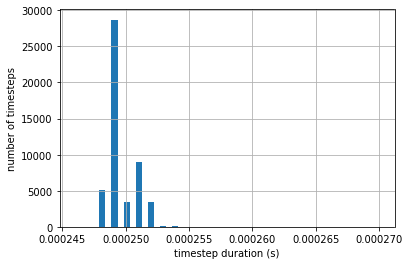

In [5]:
sequential = Measurement.read_timestep_csv('../../../logs/DP_Inverter_Grid_Sequential/DP_Inverter_Grid_Sequential_step_times.log')
data = sequential['step_time'].data
xaxis = sequential['step_time'].xaxis

print('maximum timestep:')
print(data.max())
print('standard deviation:')
print(data.std())
print('mean timestep:')
print(data.mean())

plt.figure()
plt.hist(data, 50)
plt.xlabel('timestep duration (s)')
plt.ylabel('number of timesteps')
#plt.xlim([0.0001,0.0005])
plt.grid()
#plt.savefig('parallel_rt_nolog_hist.png')

plt.figure()
plt.plot(xaxis, data)
plt.xlabel('timestep index')
plt.ylabel('timestep duration (s)')
#plt.ylim([0.0001,0.0006])
plt.grid()
#plt.savefig('parallel_rt_nolog_time.png')

## Parallel Split Frequencies - rt profile no log

maximum timestep:
8.8e-05
standard deviation:
7.808154086594344e-07
mean timestep:
4.866323999999999e-05


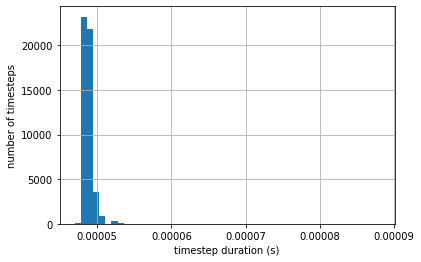

In [8]:
parallel_splitFreq = Measurement.read_timestep_csv('../../../logs/DP_Inverter_Grid_Parallel_FreqSplit/DP_Inverter_Grid_Parallel_FreqSplit_step_times.log')
data = parallel_splitFreq['step_time'].data
xaxis = parallel_splitFreq['step_time'].xaxis

print('maximum timestep:')
print(data.max())
print('standard deviation:')
print(data.std())
print('mean timestep:')
print(data.mean())

plt.figure()
plt.hist(data, 50)
plt.xlabel('timestep duration (s)')
plt.ylabel('number of timesteps')
#plt.xlim([0.0001,0.0005])
plt.grid()
#plt.savefig('parallel_rt_nolog_hist.png')

plt.figure()
plt.plot(xaxis, data)
plt.xlabel('timestep index')
plt.ylabel('timestep duration (s)')
#plt.ylim([0.0001,0.0006])
plt.grid()
#plt.savefig('parallel_rt_nolog_time.png')

## Sequential Split Frequencies - rt profile no log

In [10]:
sequential_SplitFreq = Measurement.read_timestep_csv('../../../logs/DP_Inverter_Grid_Sequential_FreqSplit/DP_Inverter_Grid_Sequential_FreqSplit_step_times.log')
data = sequential_SplitFreq['step_time'].data
xaxis = sequential_SplitFreq['step_time'].xaxis

print('maximum timestep:')
print(data.max())
print('standard deviation:')
print(data.std())
print('mean timestep:')
print(data.mean())

plt.figure()
plt.hist(data, 50)
plt.xlabel('timestep duration (s)')
plt.ylabel('number of timesteps')
#plt.xlim([0.0001,0.0005])
plt.grid()
#plt.savefig('parallel_rt_nolog_hist.png')

plt.figure()
plt.plot(xaxis, data)
plt.xlabel('timestep index')
plt.ylabel('timestep duration (s)')
#plt.ylim([0.0001,0.0006])
plt.grid()
#plt.savefig('parallel_rt_nolog_time.png')

maximum timestep:
0.000183
standard deviation:
7.678380139065774e-07
mean timestep:
0.00015531062


## Comparison

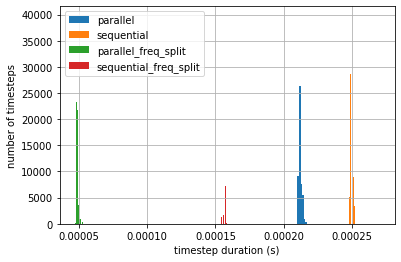

In [20]:
parallel_data = parallel['step_time'].data
parallel_xaxis = parallel['step_time'].xaxis
sequential_data = sequential['step_time'].data
sequential_xaxis = sequential['step_time'].xaxis
parallel_splitFreq_data = parallel_splitFreq['step_time'].data
parallel_splitFreq_xaxis = parallel_splitFreq['step_time'].xaxis
sequential_SplitFreq_data = sequential_SplitFreq['step_time'].data
sequential_SplitFreq_xaxis = sequential_SplitFreq['step_time'].xaxis

plt.figure()
plt.hist(parallel_data, 50, label='parallel')
plt.hist(sequential_data, 50, label='sequential')
plt.hist(parallel_splitFreq_data, 50, label='parallel_freq_split')
plt.hist(sequential_SplitFreq_data, 50, label='sequential_freq_split')
plt.xlabel('timestep duration (s)')
plt.ylabel('number of timesteps')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.legend()
#plt.xlim([0.0001,0.0005])
#plt.savefig('parallel_single_rt_nolog_hist.pdf')

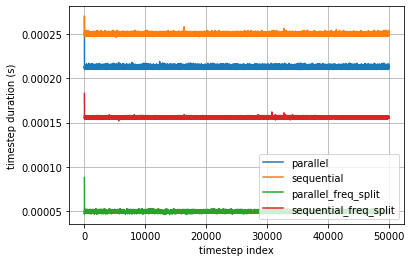

In [19]:
plt.figure()
plt.plot(parallel_xaxis, parallel_data, label='parallel')
plt.plot(sequential_xaxis, sequential_data, label='sequential')
plt.plot(parallel_splitFreq_xaxis, parallel_splitFreq_data, label='parallel_freq_split')
plt.plot(sequential_SplitFreq_xaxis, sequential_SplitFreq_data, label='sequential_freq_split')
plt.xlabel('timestep index')
plt.ylabel('timestep duration (s)')
plt.legend(loc='lower right')
plt.grid()
#plt.ylim([0.0001,0.0006])
#plt.savefig('parallel_single_rt_nolog_time.pdf')